In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("sunshine.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sunshine    11 non-null     float64
 1   attendance  11 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 308.0 bytes


In [4]:
# 1. Find correlation between every independant var and independant var

# if all cols are numeric then we can do df.corr
# if not then create numeric columns' list, Or drop those non numeric columns
df.corr()['sunshine']

sunshine      1.000000
attendance    0.976969
Name: sunshine, dtype: float64

This means attendance is increasing with sunshine

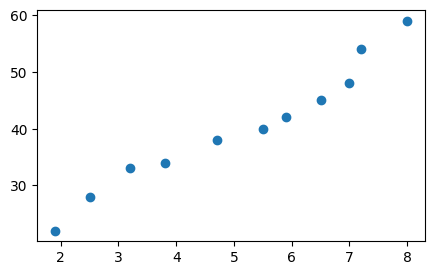

In [5]:
plt.figure(figsize = (5,3))
plt.scatter(df['sunshine'], df['attendance'])
plt.show()

 we need to find best fit line on these points
 
 best fit line is Least Sum of Square of Errors (LSSE)
 

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
x = df.iloc[:,[0]].values
y = df.iloc[:,[1]].values
print(x.shape, y.shape)

(11, 1) (11, 1)


In [8]:
model = LinearRegression()
model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
model.coef_.round(2)

array([[5.26]])

In [10]:
model.intercept_.round(2)

array([13.41])

This means : attendance = 5.26 * sunshine + 13.41

In [11]:
# test_vals = 6, 7.2, 3, 9, 12
# pass the same no. of columns that we passed while (fitting) training the model
# (11, 1) (11, 1) it was just 1 column with 11 values

test_vals = np.array([6, 7.2, 3, 9, 12])  # incorrect, it takes 0 columns i.e. 1D array
test_vals.shape

(5,)

In [12]:
test_vals = np.array([6, 7.2, 3, 9, 12]).reshape(-1,1) # now it is correct
test_vals.shape

(5, 1)

In [24]:
model.predict(test_vals)

array([[44.95673811],
       [51.26581394],
       [29.18404854],
       [60.72942769],
       [76.50211726]])

In [25]:
model.predict(np.array([10]).reshape(-1,1))


array([[65.98699088]])

In [26]:
np.array([10]).reshape(-1,1)

array([[10]])

In [27]:
model.predict([[10]])

array([[65.98699088]])

In [35]:
np.array([[10],[2.5]]).shape

(2, 1)

In [37]:
model.predict([[10],[2.5], [3]])

array([[65.98699088],
       [26.55526695],
       [29.18404854]])

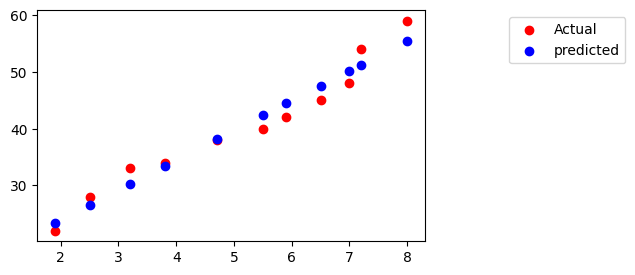

In [42]:
plt.figure(figsize=(5,3))
plt.scatter(df['sunshine'], df['attendance'], c='r',label='Actual')
plt.scatter(df['sunshine'], model.predict(x), c='b',label='predicted')
plt.legend(bbox_to_anchor=(1.2,1))
plt.show()

# Example 2

In [70]:
edf = pd.read_csv('energy.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sunshine    11 non-null     float64
 1   attendance  11 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 308.0 bytes


In [71]:
edf.corr()

,e,m,c
e,1.000000,0.970245,0.602092
m,0.970245,1.000000,0.390858
c,0.602092,0.390858,1.000000


In [72]:
edf['m'].corr(edf['e'])

np.float64(0.9702451718992819)

If correlation is between -0.2 to 0.2 it will be not cosidered as correlated. IT has noise

In [73]:
x = edf.iloc[:,[1,2]].values
y = edf.iloc[:,[0]].values
print(x.shape,y.shape)

(8, 2) (8, 1)


In [74]:
model2 = LinearRegression()
model2.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [75]:
model2.coef_  # 2 coefficients because no. of cols = 2

array([[1. , 1.5]])

In [76]:
test_val = np.array([[10,3]]).reshape(1,2)

In [77]:
model2.predict(test_val)

array([[14.5]])

In [78]:
model2.predict([[10,3]])

array([[14.5]])

In [79]:
np.array([[10,3]]).shape

(1, 2)

In [80]:
model2.predict([[10,3], [12,4]])

array([[14.5],
       [18. ]])